# Python Project

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# loading the dataset
df = pd.read_csv("project_data.csv")

## Preprocessing

In [12]:
df.shape
# the data is having 458rows and 9columns

(458, 9)

In [31]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [16]:
# to check the datatypes and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [19]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

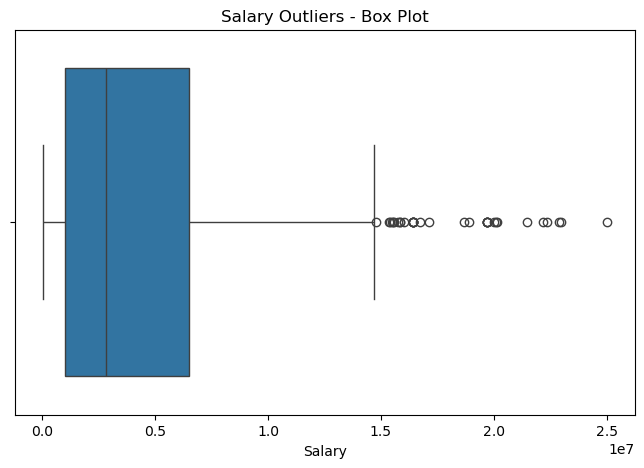

In [27]:
# Boxplot to know outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Salary"])
plt.title("Salary Outliers - Box Plot")
plt.xlabel("Salary")
plt.show()

In [33]:
# the salary data is having extreme outliers so filling the salary column with median for the 11 null values
# college column is not important for analysis so  ignoring the nulls
df["Salary"].fillna(df["Salary"].median(), inplace=True)

C:\Users\jayak\AppData\Local\Temp\ipykernel_16804\3603552744.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Salary"].fillna(df["Salary"].median(), inplace=True)


In [35]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [37]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary       0
dtype: int64

In [39]:
'''Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and
integrity before proceeding with analysis.'''
df["Height"] = np.random.randint(150, 181, size=len(df))


In [41]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,173,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,177,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,167,205,Boston University,2836186.0
3,R.J. Hunter,Boston Celtics,28,SG,22,154,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,152,231,NaN,5000000.0


## Analysis Tasks

In [46]:
'''Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.'''
team_distribution = df["Team"].value_counts()
team_percentage = (team_distribution / len(df)) * 100
team_summary = pd.DataFrame({"Employee Count": team_distribution, "Percentage (%)": team_percentage.round(2)})
print(team_summary)

                        Employee Count  Percentage (%)
Team                                                  
New Orleans Pelicans                19            4.15
Memphis Grizzlies                   18            3.93
Utah Jazz                           16            3.49
New York Knicks                     16            3.49
Milwaukee Bucks                     16            3.49
Brooklyn Nets                       15            3.28
Portland Trail Blazers              15            3.28
Oklahoma City Thunder               15            3.28
Denver Nuggets                      15            3.28
Washington Wizards                  15            3.28
Miami Heat                          15            3.28
Charlotte Hornets                   15            3.28
Atlanta Hawks                       15            3.28
San Antonio Spurs                   15            3.28
Houston Rockets                     15            3.28
Boston Celtics                      15            3.28
Indiana Pa

In [48]:
'''Segregate employees based on their positions within the company.'''
position_distribution = df["Position"].value_counts()
position_percentage = (position_distribution / len(df)) * 100
position_summary = pd.DataFrame({"Employee Count": position_distribution, "Percentage (%)": position_percentage.round(2)})
print(position_summary)

          Employee Count  Percentage (%)
Position                                
SG                   102           22.27
PF                   100           21.83
PG                    92           20.09
SF                    85           18.56
C                     79           17.25


In [58]:
'''Identify the predominant age group among employees. (2 marks)'''
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
df["age_group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)
age_distribution = df["age_group"].value_counts().sort_index()
predominant_age_group = age_distribution.idxmax()
print("Age Group Distribution:\n", age_distribution)
print("\nPredominant Age Group:", predominant_age_group)

Age Group Distribution:
 age_group
18-25    154
26-35    272
36-45     32
46-55      0
56-65      0
Name: count, dtype: int64

Predominant Age Group: 26-35


In [68]:
'''Discover which team and position have the highest salary expenditure.'''
team_salary_expenditure = df.groupby("Team")["Salary"].sum().sort_values(ascending=False)
highest_paid_team = team_salary_expenditure.idxmax()
highest_team_salary = team_salary_expenditure.max()
position_salary_expenditure = df.groupby("Position")["Salary"].sum().sort_values(ascending=False)
highest_paid_position = position_salary_expenditure.idxmax()
highest_position_salary = position_salary_expenditure.max()
print("Salary Expenditure by Team:\n", team_salary_expenditure)
print(f"\nHighest Salary Expenditure Team: {highest_paid_team} (Total: {highest_team_salary})")
print("\nSalary Expenditure by Position:\n", position_salary_expenditure)
print(f"\nHighest Salary Expenditure Position: {highest_paid_position} (Total: {highest_position_salary})")


Salary Expenditure by Team:
 Team
Cleveland Cavaliers       109824875.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Miami Heat                 88188045.0
Memphis Grizzlies          87895624.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Charlotte Hornets          78340920.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Denver Nuggets             62958116.0
Minnesota Timberwolves     62545883.0
Boston Celtics  

In [72]:
'''Investigate if there's any correlation between age and salary, and represent it visually.'''
correlation = df["Age"].corr(df["Salary"])
print(f"Correlation between Age and Salary: {correlation:.2f}")

Correlation between Age and Salary: 0.21


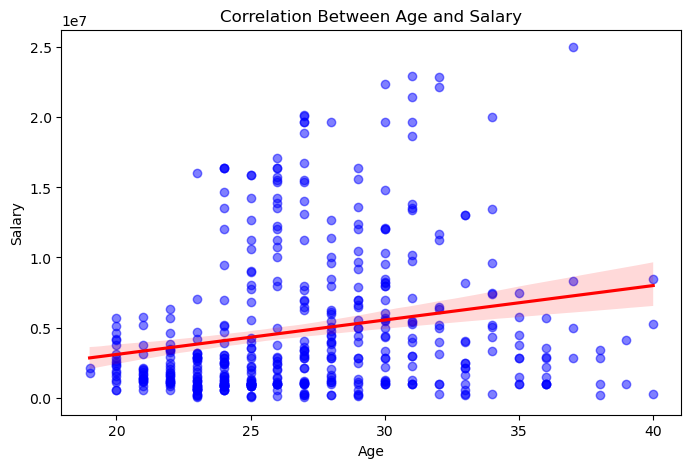

In [82]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Age"], y=df["Salary"], scatter_kws={"color": "blue", "alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()

In [ ]:
'''Weak correlation:Age has some influence on salary, but other factors (like experience, position, or department) 
likely have a stronger impact.Older employees may earn more, but the increase is not consistent across all cases.'''

## Graphical Representation

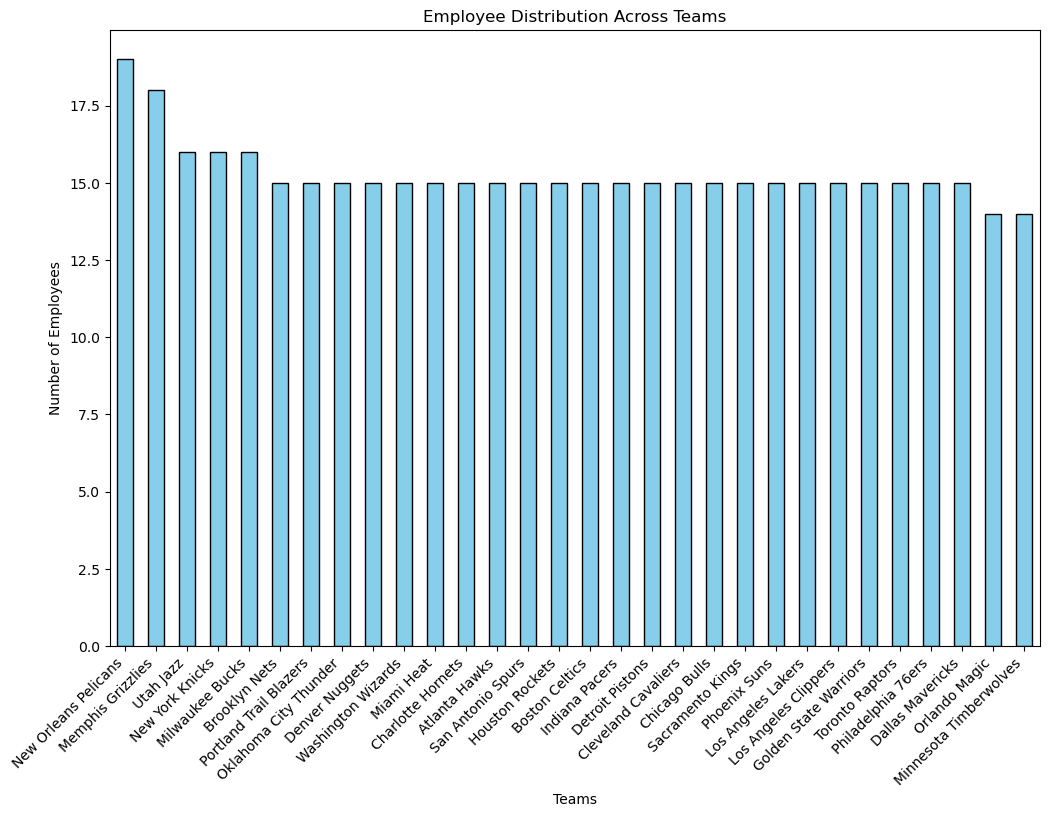

In [118]:
plt.figure(figsize=(12, 8))
team_summary["Employee Count"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Teams")
plt.xticks(rotation=45, ha='right') 
plt.show()

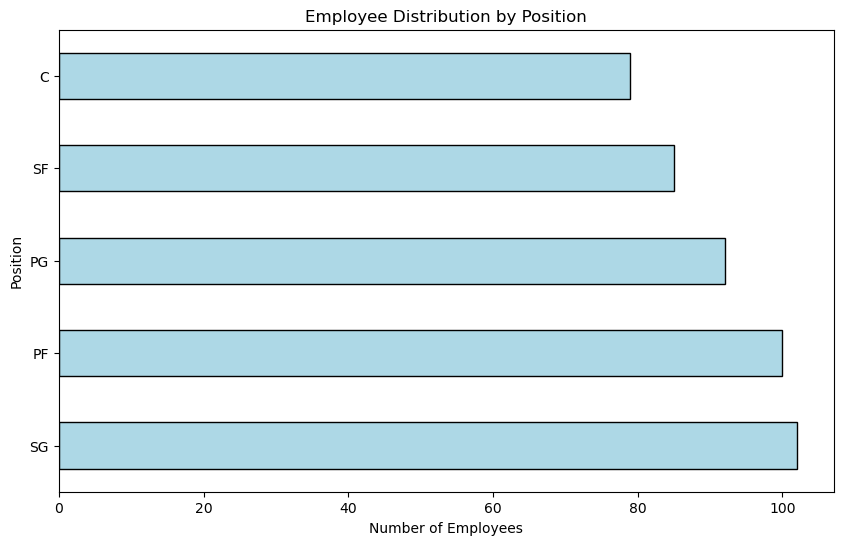

In [102]:
plt.figure(figsize=(10, 6))
position_summary["Employee Count"].plot(kind="barh", color="lightblue", edgecolor="black")
plt.xlabel("Number of Employees")
plt.ylabel("Position")
plt.title("Employee Distribution by Position")
plt.show()

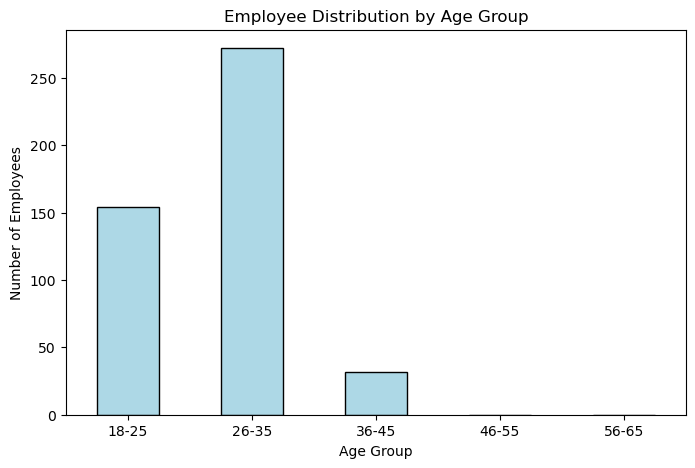

In [89]:
plt.figure(figsize=(8, 5))
age_distribution.plot(kind="bar", color="lightblue", edgecolor="black")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution by Age Group")
plt.xticks(rotation=0)
plt.show()

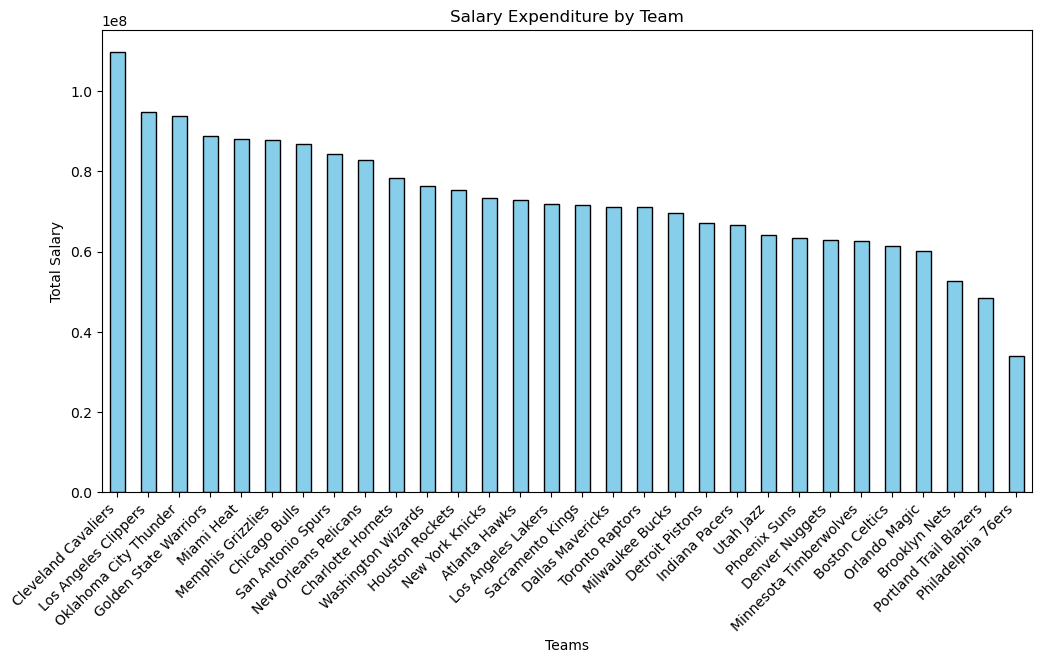

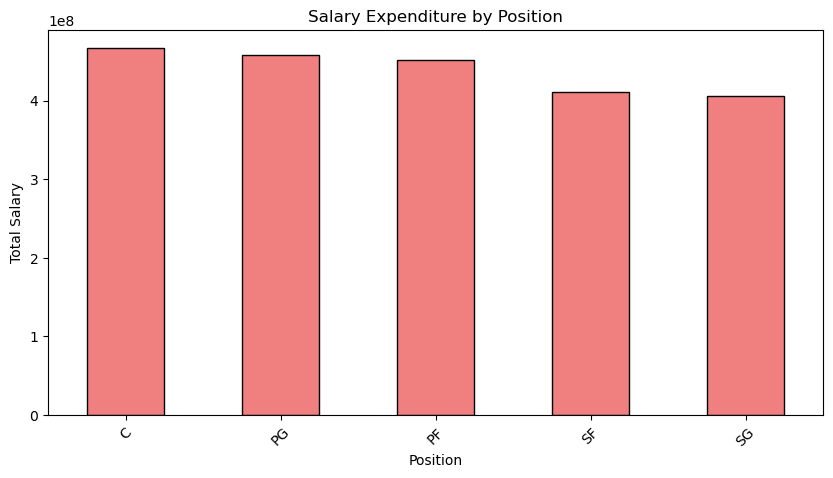

In [114]:
plt.figure(figsize=(12, 6))  # Increase figure size for better spacing
team_salary_expenditure.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Teams")
plt.ylabel("Total Salary")
plt.title("Salary Expenditure by Team")
plt.xticks(rotation=45, ha='right')  
plt.show()

# Plot salary expenditure by position
plt.figure(figsize=(10, 5))
position_salary_expenditure.plot(kind="bar", color="lightcoral", edgecolor="black")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.title("Salary Expenditure by Position")
plt.xticks(rotation=45)
plt.show()

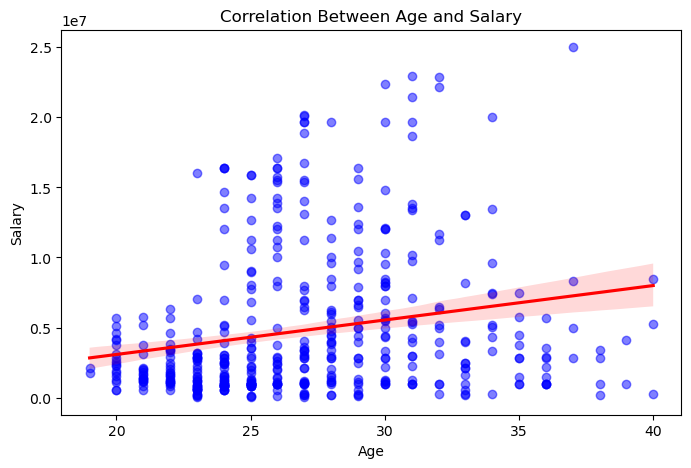

In [120]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df["Age"], y=df["Salary"], scatter_kws={"color": "blue", "alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()

## Data Story:

### Findings

1. From team summary analysis team: New Orleans Pelicans is having the maximum count of employees (19) and also compared to the overall team percentage New Orleans Pelicans having maximum percentage(4.15%).
2.  The position: SG is having maximum number of employees(102) and the percentage(22.27%).
3.  Predominant Age Group: 26-35.
4.  The team:Cleveland Cavaliers is having the maximum salary expenditure(109824875.0) and for the postion :C 466377332.0).
5.  correlation between age and salary : 0.21, Weak correlation:Age has some influence on salary, but other factors (like experience, position, or department) likely have a stronger impact.Older employees may earn more, but the increase is not consistent across all cases.


